In [2]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt


# Mean Squared Error

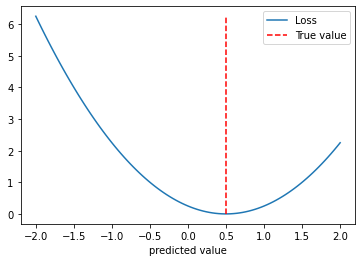

In [3]:
#loss function
lossfunMSE = nn.MSELoss()

# create predictions and real answers
yHat = torch.linspace(-2,2,101)
y = torch.tensor(.5)

# compute MSE loss function
L = np.zeros(101)
for i,yy in enumerate(yHat):
    L[i] = lossfunMSE(yy,y)

plt.plot(yHat,L,label='Loss')
plt.plot([y,y],[0,np.max(L)],'r--',label='True value')
plt.xlabel('predicted value')
plt.legend()
plt.show()

# Binary Cross Entropy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: http://matp

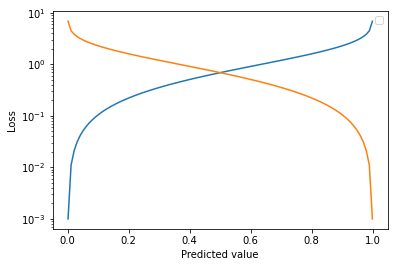

In [4]:
#loss function
lossfunBCE = nn.BCELoss()

# create predictions and real answer
yHat = torch.linspace(.001,.999,101)
y1 = torch.tensor(0.)
y2 = torch.tensor(1.)

# compute MSE loss function
L = np.zeros((101,2))
for i,yy in enumerate(yHat):
    L[i,0] = lossfunBCE(yy,y1)
    L[i,1] = lossfunBCE(yy,y2)

plt.plot(yHat,L)
plt.xlabel('Predicted value')
plt.ylabel('Loss')
plt.legend('correct=0','correct=1')
plt.yscale('log')
plt.show()

In [5]:
# The example above shows data already in probabilities. Raw outputs will need to be converted to probabilities:
# raw output of model
yHat = torch.tensor(2.)
#print(lossfunBCE(yHat,y2))

# convert to prob via sigmoid
sig = nn.Sigmoid()
print(lossfunBCE(sig(yHat) ,y2))

tensor(0.1269)


In [6]:
# However, PyTorch recommends using a single function that incorporates sigmoid+BCE due to increased numerical stability.
# https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html?highlight=nn%20bcewithlogitsloss#torch.nn.BCEWithLogitsLoss

# thus the recommended way to do it
lossfunBCE = nn.BCEWithLogitsLoss()
yHat = torch.tensor(2.)
print(lossfunBCE(yHat,y2))


tensor(0.1269)


# Categorical cross-entropy

In [8]:
#loss function
lossfunCCE = nn.CrossEntropyLoss()

# vector of output layer (pre-softmax)
yHat = torch.tensor([[1.,4,3]])

for i in range(3):
    correctAnswer = torch.tensor([i])
    thisloss = lossfunCCE(yHat,correctAnswer).item()
    print( 'Loss when correct answer is %g: %g' %(i,thisloss) )

Loss when correct answer is 0: 3.34901
Loss when correct answer is 1: 0.349012
Loss when correct answer is 2: 1.34901


In [11]:
# Repeat using pre-softmaxified output
sm = nn.Softmax(dim=1)
yHat_sm = sm(yHat)

for i in range(3):
    correctAnswer = torch.tensor([i])
    thisloss = lossfunCCE(yHat_sm,correctAnswer).item()
    print( 'Loss when correct answer is %g: %g' %(i,thisloss) )

Loss when correct answer is 0: 1.43658
Loss when correct answer is 1: 0.766318
Loss when correct answer is 2: 1.21221


In [13]:
# compare raw,softmax, and logsoftmax defined

sm = nn.LogSoftmax(dim=1)
yHat_logsm = sm(yHat)

# print them
print(yHat)
print(yHat_sm)
print(yHat_logsm)

tensor([[1., 4., 3.]])
tensor([[0.0351, 0.7054, 0.2595]])
tensor([[-3.3490, -0.3490, -1.3490]])


# Creating your own loss-function

In [14]:
class myLoss(nn.Module): # inherent info from nn.Module
  def __init__(self):
    super().__init__()
      
  def forward(self,x,y):
    loss = torch.abs(x-y)
    return loss

# test it out!
lfun = myLoss()
lfun(torch.tensor(4),torch.tensor(5.2))

tensor(1.2000)